### Visualization of individual data on map with `folium`, `geoJSON` and `pandas DataFrame`

#### 1. Preparation
##### 1.1. Load `folium`
> official `github` : https://github.com/python-visualization/folium  
> documentation : https://python-visualization.github.io/folium/index.html  
> examples : https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/  
> plugins : https://python-visualization.github.io/folium/plugins.html#folium-plugins  
> * sample 1 : https://dailyheumsi.tistory.com/85?category=815369  
> * sample 2 : https://dailyheumsi.tistory.com/92?category=815369  
  
> contributions : https://nbviewer.jupyter.org/github/python-visualization/folium_contrib/tree/master/notebooks/  

In [1]:
import folium

##### 1.2. Function: capture `html` to `png`  
* This case is for `Firefox`.  
```python
browser = webdriver.Firefox()
```  
should be modified according to the browser.  
* Since the size of `html` is too large sometimes, `png` is preferred.  
* Large `html` file exceeds the maximum waiting time for rendering.
  - in this case, edit `browser.set_page_load_timeout(time_in_seconds)` part with larger number

In [2]:
from selenium import webdriver
import time, os

!export PATH="/home/jehyun/PycharmProjects/selenium/:$PATH"

def html2png(m,                     # foium map instance
             html_name,             # str. ex. 'testmap.html'
             png_name='map.png',    # str. ex. 'testmap.png'
             delay=5,               # int or float. ex. 10
             ):

    delay=delay
    fn = 'html/' + html_name
    tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
    m.save(fn)

    browser = webdriver.Firefox()

    try:
        browser.set_page_load_timeout(600)
        browser.get(tmpurl)
        
    except TimeoutException as ex:
        isrunning = 0
        print("Exception has been thrown. " + str(ex))
        browser.close()

    #Give the map tiles some time to load
    time.sleep(delay)
    browser.save_screenshot('./images/'+png_name)
    browser.quit()

##### 1.3. Function : `pandas DataFrame` to `markdown`

In [3]:
# Nice representation of dataframe in markdown
import pandas as pd
import copy
from IPython.display import Markdown, display

def df2md(df, maxlen=20):
    _df = copy.deepcopy(df)
    
    for col in _df.columns:
        _df[col] = _df[col].astype('str')
        if (_df[col].str.len()> maxlen).any() :
            _df[col].loc[_df[col].str.len() > maxlen] = _df[col].str.slice(stop=maxlen) + ' ...'

    if '(index)' not in _df.columns:
        _df.insert(0, '(index)', df.index)
        
    fmt = ['---' for i in range(len(_df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=_df.columns)
    df_formatted = pd.concat([df_fmt, _df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    _df.drop(columns='(index)', axis=1, inplace=True)

#### 2. Load Data
##### 2.1. Solar Radiation data on each buildings in Daejeon

In [4]:
df = pd.read_excel('NGL.xlsx')
df.drop(index=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df2md(df.head())

(index)|gid|buld_se_cd|buld_se_nm|bdtyp_cd|apt_yn|gro_flo_co|sig_cd|sig_nm|emd_cd|emd_nm|tm_x|tm_y|lon|lat|buld_area|buld_elev|m01|m02|m03|m04|m05|m06|m07|m08|m09|m10|m11|m12|y17|st_m01|st_m02|st_m03|st_m04|st_m05|st_m06|st_m07|st_m08|st_m09|st_m10|st_m11|st_m12|st_y17
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|24300|0|지상|4299|N|1|30110|동구|30110137|대별동|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80|61.587998174704|76.368132857176|108.372413947032|130.399191728005|153.301471581826|138.981246232986|94.1192299952874|116.160557618508|107.075909293615|76.0582836270332|63.2461349872442|57.7913106771616|1183.46187899663|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
1|16295|0|지상|1001|N|1|30110|동구|30110105|가오동|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71|54.6587660438136|74.3240604024184|109.983418941498|131.021371841431|148.915192252711|136.026762912148|91.4622986442164|112.346493419848|109.010571178637|75.9642522084086|59.7529277174096|48.7103261571181|1152.17643617329|77.5996551513672|96.7234191894531|136.413635253906|159.390518188477|180.87614440918|165.518310546875|112.231346130371|137.366897583008|134.195907592773|96.3771133422852|79.9522476196289|72.7179718017578|1449.36315917969
2|24341|0|지상|1001|N|1|30110|동구|30110137|대별동|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77|62.304043189339|78.0388102324113|110.389678457509|130.250699416451|150.068157859471|135.022302627563|92.2708638232687|114.937465916509|108.497603748156|77.568351952926|64.5584099811056|58.3052325248718|1182.21162281866|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
3|24345|0|지상|4402|N|1|30110|동구|30110137|대별동|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78|48.6805400936692|60.6419043452651|86.4692395528158|105.063324045252|123.864551473547|112.271188029536|75.3915986661558|93.4298842041581|85.6682357434873|60.3520038746021|50.0022062372278|45.6562534349936|947.490926106771|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
4|24374|0|지상|18999|N|1|30110|동구|30110137|대별동|241500.967910986|409605.204042476|127.461942445015|36.2835354035404|455.844166700596|80|67.2504756116031|84.0601618833709|119.429690775118|141.218664905481|162.556833049707|146.167080444202|99.8334377941332|124.410167208889|117.419092797396|83.4298420412499|69.2576492167356|62.8880742809229|1277.92121626201|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281


##### 2.2. `JSON` files for Administrative districts

In [5]:
# 'gu' and dong' data in Korea
gu = f'https://raw.githubusercontent.com/jehyunlee/data-snippet/master/Korea_gu_20.json' 
dong = f'https://raw.githubusercontent.com/jehyunlee/data-snippet/master/Korea_dong_20.json' 

###### 2.2.1. Function : Load `JSON` from web

In [6]:
import json
import urllib.request

def read_webjson(url):
  with urllib.request.urlopen(url) as src:
    data = json.loads(src.read().decode(), encoding='utf-8')
    return data 

###### 2.2.2. Load `JSON` from web(gu) and local(dong)

In [7]:
gu_data = read_webjson(gu)    # read 'gu' json from data-snippet

# read 'dong'
# For unknown reason, it is not possible to read from web.
dong_data = json.loads(open('./geojsons/Korea_dong_20.json', 'r', encoding='utf-8').read())

###### 2.2.3. Data Validataion

In [8]:
# Extracting 'gu' data from JSON
gu_dj = {}
gu_dj_value = []
SIG_KOR_NM = []    # list of 'gu's

for key, value in gu_data.items():
  if key != 'features':
    gu_dj.update({key: value})
  else:
    for feature in gu_data['features']:
      properties = feature['properties']
      sig_cd = properties['SIG_CD']
      if sig_cd[:2] == '30':
        SIG_KOR_NM.append(properties['SIG_KOR_NM'])
        gu_dj_value.append(feature)
gu_dj['features'] = gu_dj_value
        
print('# of "gu"s in Daejeon = {}'.format(len(SIG_KOR_NM)))
print(SIG_KOR_NM)        

# save list of 'gu's in json format
with open("gu_dj.json","w", encoding='utf-8') as jsonfile:
        json.dump(gu_dj,jsonfile,ensure_ascii=False)

# of "gu"s in Daejeon = 5
['동구', '중구', '서구', '유성구', '대덕구']


In [9]:
import numpy as np

# 1. Grouping 'dong' data from Solar Radiation

df_dong = df.groupby(by='emd_nm').mean().reset_index()

# 2. Extracting 'dong' data from JSON
dong_dj = {}
dong_dj_value = []
EMD_KOR_NM = []    # list of 'dong's

for key, value in dong_data.items():
  if key != 'features':
    dong_dj.update({key: value})
  else:
    for feature in dong_data['features']:
      properties = feature['properties']
      emd_cd = properties['EMD_CD']
      if emd_cd[:2] == '30': # 'dong' filter : only in Daejeon
        EMD_KOR_NM.append(properties['EMD_KOR_NM'])
        dong_dj_value.append(feature)
dong_dj['features'] = dong_dj_value

print('# of "dong"s in Daejeon(JSON) = {}'.format(len(EMD_KOR_NM)))  # Wrong Value : Duplicates exist 
print(sorted(EMD_KOR_NM))  

# 3. Find duplicates - geoJSON compression might have caused geometric split
import collections
print('\nDuplicates are {}'.format([item for item, count in collections.Counter(EMD_KOR_NM).items() if count > 1]))
EMD_KOR_NM = list(np.sort(np.unique(np.array(EMD_KOR_NM))))

print('\n# of  "dong"s in Daejeon(JSON, unique) = {}'.format(len(EMD_KOR_NM)))
print(sorted(EMD_KOR_NM))

# 4. Find missings - data from solar irradiation might have missing data
dong_solar = df_dong['emd_nm'].unique()
missing = []
for dong in EMD_KOR_NM:
  if dong not in dong_solar:
    missing.append(dong)
    
print('\nMissing "dong"s(Solar) = {}'.format(missing))

# 5. Save list of 'dong's in json format, including duplicates,
# because it is not important to treat them at the moment.
with open("dong_dj.json","w", encoding='utf-8') as jsonfile:
        json.dump(dong_dj,jsonfile,ensure_ascii=False)

# of "dong"s in Daejeon(JSON) = 177
['가수원동', '가양동', '가오동', '가장동', '가정동', '갈마동', '갈전동', '갑동', '계산동', '관저동', '관평동', '괴곡동', '괴정동', '교촌동', '구도동', '구룡동', '구성동', '구암동', '구완동', '궁동', '금고동', '금동', '금탄동', '낭월동', '내동', '내탑동', '노은동', '대동', '대동', '대별동', '대사동', '대성동', '대정동', '대화동', '대흥동', '덕명동', '덕암동', '덕진동', '도룡동', '도마동', '도안동', '둔곡동', '둔산동', '마산동', '만년동', '매노동', '목달동', '목동', '목상동', '무수동', '문지동', '문창동', '문평동', '문화동', '미호동', '반석동', '방동', '방현동', '법동', '변동', '복수동', '복용동', '봉곡동', '봉명동', '봉산동', '부사동', '부수동', '비래동', '비룡동', '사성동', '사정동', '산성동', '산직동', '삼괴동', '삼성동', '삼정동', '삼정동', '상대동', '상서동', '상소동', '석교동', '석봉동', '선화동', '성남동', '성북동', '세동', '세천동', '소제동', '소호동', '송강동', '송정동', '송촌동', '수남동', '신대동', '신동', '신봉동', '신상동', '신성동', '신안동', '신일동', '신촌동', '신탄진동', '신하동', '신흥동', '안산동', '안영동', '어남동', '어은동', '연축동', '오동', '오동', '오류동', '오정동', '옥계동', '와동', '외삼동', '용계동', '용계동', '용두동', '용문동', '용산동', '용운동', '용전동', '용촌동', '용호동', '우명동', '원내동', '원동', '원신흥동', '원정동', '원촌동', '월평동', '유천동', '은행동', '읍내동', '이사동', '이현동', '인동', '자양동', '자운동

#### 3. Data Visualization
> How to use colormap with `folium` marker plot : https://stackoverflow.com/questions/56876620/unsure-how-to-use-colormap-with-folium-marker-plot  
> Colormap code-snippets : https://stackoverflow.com/questions/52911688/python-folium-choropleth-map-colors-incorrect/52981115#52981115  
> Colormap and other code-snippets : http://incredible.ai/code-snippet/2019/03/16/GeoHash-And-GeoPandas/  
> Color gradient code-snippets : https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python  

##### 3.1. Find Map Center Coordination

In [10]:
# center of the map

lon_avg = df['lon'].mean()
lat_avg = df['lat'].mean()
print(lon_avg, lat_avg)

127.4013580315068 36.340743659590096


##### 3.2. Function : Additive Color Operation 

In [11]:
def add_color(c1, c2, c3, ipol=0):
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    c3=np.array(mpl.colors.to_rgb(c3))
    if ipol < 0.25:
        c = c1 + 4*ipol * c2
    elif ipol < 0.5:
        c = (2 - 4*ipol) * c1 + c2
    elif ipol < 0.75:
        c = c2 + (4*ipol-2) * c3
    else:
        c = (4 - 4*ipol) * c2 + c3
    
    if c.max() > 1:
        c = c/c.max()
        
    return mpl.colors.to_hex(c)

##### 3.3. Function : Map + Admistrative Districts + Data + Customized Colormap

In [12]:
import branca
import branca.colormap as cm
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def dj_datamap(df,               # pandas DataFrame
               col,              # column to plot in df
               *colors,          # colors for colormap formation : [c1, c2, c3]
               legend = None,    # legend. if None, 'col' is applied.
               datanum = None,   # number of data to plot. if None, all data.
               binmin = None,    # min. value of data to colorize
               binmax = None,    # max. value of data to colorize
               binstep = 5,      # number of bins 
               colortype = 'linear'  # 'linear' or 'step'
              ):
    # filename to be saved
    filename = '{}_{}'.format(col, legend)
    
    # folium map
    m = folium.Map(location=[lat_avg, lon_avg], 
                   tiles='CartoDB positron',
                   zoom_start=11)

    # style function for 'gu'
    style_function_gu = {
                    'opacity': 0.7,
                    'weight':1,
                    'fillOpacity': 1,
                    'color': 'black',
                    'fillColor': 'white'
                    }
    
    # style function for 'dong'
    style_function_dong = {
                    'opacity': 0.7,
                    'weight':1,
                    'fillOpacity': 0,
                    'color': 'gray',
                    'fillColor': 'white'
                    }

    # plot: adminstrative districts 'gu'
    folium.GeoJson(gu_dj, name='gu_dj',
                   style_function=lambda x: style_function_gu        # style_function has to be a function which calls dictionary
                  ).add_to(m)        # Overlay on map
    
    # plot : administrative districts 'dong'
    folium.GeoJson(dong_dj, name='dong_dj',
                   style_function=lambda x: style_function_dong        # style_function has to be a function which calls dictionary
                  ).add_to(m)        # Overlay on map

    # colormap settings
    # - values to colorize
    if binmin == None:
        vmin = df[col].min()
    else:
        vmin = binmin
        
    if binmax == None:    
        vmax = df[col].max()
    else:
        vmax = binmax
    
    # - number of data to plot
    if datanum == None:
        datanum = df.shape[0]
    
    # - colormap configuration
    c1 = colors[0][0]
    c2 = colors[0][1]
    c3 = colors[0][2]
    
    if colortype == 'linear':
        clrmap = cm.LinearColormap(colors=[c1, c2, c3], vmin=vmin, vmax=vmax)
    elif colortype == 'step':
        _colors = []
        for i in range(binstep+1):
            _colors.append(add_color(c1, c2, c3, i/(binstep)))
        
        #- colormap visualization
        bins = np.linspace(vmin, vmax, num=binstep+1)
    
        fig, axes = plt.subplots(figsize=(2,4), nrows=binstep+1, ncols=2, sharex=True)
        for i in range(binstep+1):
            rect = axes[i][0].patch
            rect.set_facecolor(_colors[binstep-i-1])
            if i == binstep:
                rect.set_alpha(0)
            axes[i][0].set_xlabel('')
            axes[i][0].set_ylabel('')
            axes[i][0].set_xticks([])
            axes[i][0].set_yticks([])
            axes[i][0].set_xticklabels([])
            axes[i][0].set_yticklabels([])
            axes[i][0].spines['top'].set_visible(True)
            axes[i][0].spines['right'].set_visible(False)
            axes[i][0].spines['bottom'].set_visible(False)
            axes[i][0].spines['left'].set_visible(False)
        for i in range(binstep+1):
            axes[i][1].text(0.1, 1, '{:d}'.format(int(bins[binstep-i])), transform=axes[i][1].transAxes, fontsize=14, va='top', ha='left')
            axes[i][1].set_xlabel('')
            axes[i][1].set_ylabel('')
            axes[i][1].set_xticks([])
            axes[i][1].set_yticks([])
            axes[i][1].set_xticklabels([])
            axes[i][1].set_yticklabels([])
            axes[i][1].spines['top'].set_visible(False)
            axes[i][1].spines['right'].set_visible(False)
            axes[i][1].spines['bottom'].set_visible(False)
            axes[i][1].spines['left'].set_visible(False)
            
        plt.subplots_adjust(wspace=0, hspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
        #plt.tight_layout()
        plt.savefig('./images/{}_legend.png'.format(filename))
        plt.show()
        
        clrmap = cm.StepColormap(colors=_colors, vmin=vmin, vmax=vmax,
                                index=np.linspace(vmin, vmax, binstep+1))
    
    # plot : data as markers (actually, dots)
    for idx in df.index[:datanum]:
        # Get longitude/latitude
        lon = df.at[idx, 'lon']
        lat = df.at[idx, 'lat']

        data = df.at[idx, col]
       
        folium.CircleMarker(
            location = [lat, lon],
            color='grey',
            fill_color=clrmap(data),
            fill_opacity=1,
            radius=0.5,
            weight=0
        ).add_to(m)
        
    # legend
    if colortype == 'linear':
        clrmap = clrmap.to_step(index=np.linspace(vmin, vmax, num=binstep))
    elif colortype == 'step':
        pass
    
    if legend == None:
        legend = col
    
    clrmap.caption=legend
    clrmap.add_to(m)

    # layer control ON
    folium.LayerControl().add_to(m)
    
    # save as file
    html2png(m, '{}.html'.format(filename), '{}.png'.format(filename))
    
    return _colors

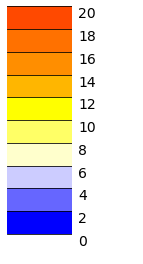

['#0000ff',
 '#6666ff',
 '#ccccff',
 '#ffffcc',
 '#ffff66',
 '#ffff00',
 '#ffb600',
 '#ff8e00',
 '#ff7100',
 '#ff4900',
 '#ff0000']

In [13]:

colors = ['blue', 'yellow', 'red']
dj_datamap(df, 'gro_flo_co', colors, legend='number of floors', datanum=None, binmin=0, binmax=20, binstep=10, colortype='step')

Note : the `html` file is about 70 MB, where `png` file is only about 640 KB.  